# Project: New User Booking 

 Airbnb​​ ​ is​ ​ an​ ​ online​ ​ marketplace​ ​ and​ ​ hospitality​ ​ service,​ ​ enabling​ ​ people​ ​ to​ ​ lease​ ​ or​ ​ rent​ ​ short-term
lodging​ ​ including​ ​ vacation​ ​ rentals​ ​ , ​ ​ apartment​ ​ rentals,​ ​ homestays​ ​ , ​ ​ hostels​ ​ beds,​ ​ or​ ​ hotel​ ​ roo​ ms.
New​ ​ users​ ​ on​ ​ Airbnb​ ​ can​ ​ book​ ​ a ​ ​ place​ ​ to​ ​ stay​ ​ in​ ​ 34,000+​ ​ cities​ ​ across​ ​ 190+​ ​ countries.​ ​ 

- **Objective :**

   To predict travel destinations of users
   
-  **Dataset** -- Train_users.csv
 
    There are 16 features used to describe each user in the dataset:
    *         user id
    *         the date of account creation
    *         timestamp of the first activity, note that it can be earlier than
    *         date of first booking
    *         gender
    *         age
    *         signup_method
    *         the page a user came to signup up from
    *         international language preference
    *         what kind of paid marketing
    *         where the marketing is e.g. google, craigslist, other
    *         whats the first marketing the user interacted with before the signing up
    *         signup_app
    *         first_device_type
    *         first_browser

In [51]:
## import necessary packages
import numpy as np
import pandas as pd
import time
import random
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
pd.set_option('display.max_columns', None)

%matplotlib inline
plt.style.use('ggplot')

## Load data

In [52]:
df = pd.read_csv('train_users.csv')

In [53]:
print(df.shape)
print(df.columns)

(213451, 16)
Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


In [54]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,6/28/10,2.009030e+13,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,5/25/11,2.009050e+13,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,9/28/10,2.009060e+13,8/2/10,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,12/5/11,2.009100e+13,9/8/12,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,9/14/10,2.009120e+13,2/18/10,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null float64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 26.1+ MB


In [56]:
print ('dataset ({} rows) \n null value of each variable:\n'.format(df.shape[0]))
print (df.isnull().sum())

dataset (213451 rows) 
 null value of each variable:

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64


## Data Cleaning

#### 1) gender

In [57]:
#replacing gender values which are not present to Nan
df.gender.replace('-unknown-',np.nan, inplace=True)
print(df.head())

           id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn              6/28/10            2.009030e+13                NaN   
1  820tgsjxq7              5/25/11            2.009050e+13                NaN   
2  4ft3gnwmtx              9/28/10            2.009060e+13             8/2/10   
3  bjjt8pjhuk              12/5/11            2.009100e+13             9/8/12   
4  87mebub9p4              9/14/10            2.009120e+13            2/18/10   

   gender   age signup_method  signup_flow language affiliate_channel  \
0     NaN   NaN      facebook            0       en            direct   
1    MALE  38.0      facebook            0       en               seo   
2  FEMALE  56.0         basic            3       en            direct   
3  FEMALE  42.0      facebook            0       en            direct   
4     NaN  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type 

#### 2) age

In [58]:
age = df['age']
age.fillna(-1, inplace = True)

In [59]:
## This are birthdays instead of age (estimating age by doing 2016 - value)
age = np.where(np.logical_and(age<2005, age>1900), 2017-age, age)
## This is the current year insted of age, we also consider this as N/A
age = np.where(np.logical_and(age<2016, age>2010), -1, age) 

In [60]:
df['age'] = age

## Exploratory Data Analysis

#### 1) country destinations

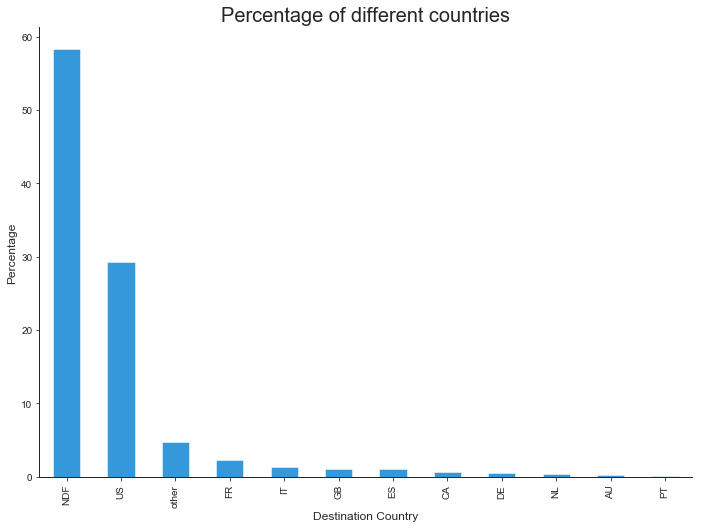

In [61]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
destination_percentage = df.country_destination.value_counts() / df.shape[0] * 100
destination_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
plt.title('Percentage of different countries', size=20)
sns.despine()

* Observations :
      1 .  57% of users in dataset did not travel anywhere .
      2 .  28 % of users travelled in their home country i.e ..,U.S .
      
#### 2) device type

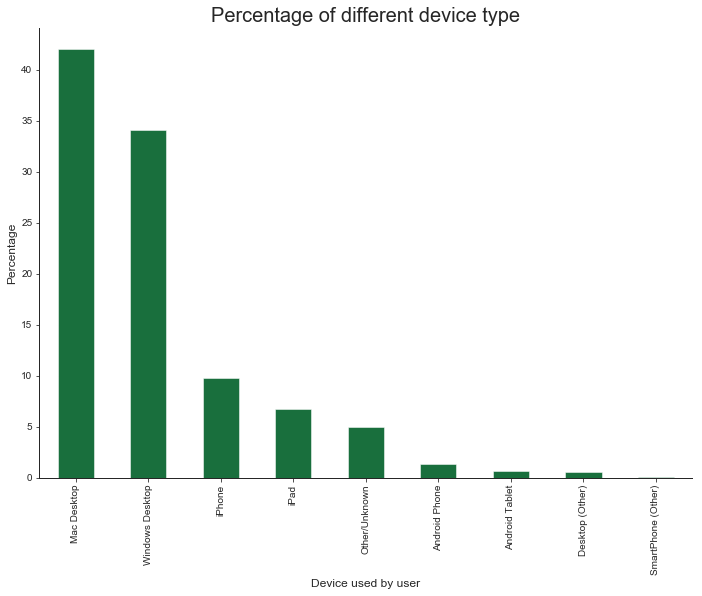

In [62]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
device_percentage = df.first_device_type.value_counts() / df.shape[0] * 100
device_percentage.plot(kind='bar',color='#196F3D')
plt.xlabel('Device used by user')
plt.ylabel('Percentage')
plt.title('Percentage of different device type', size=20)
sns.despine()

* Observations :
      1 .  58% users are using Apple products .
      2 .  Out of 71,719 users who travelled atleast once,31660 users are apple users 
      3 .  44.15%  which implies Mac users are booking more frequently .
      
#### 3) age

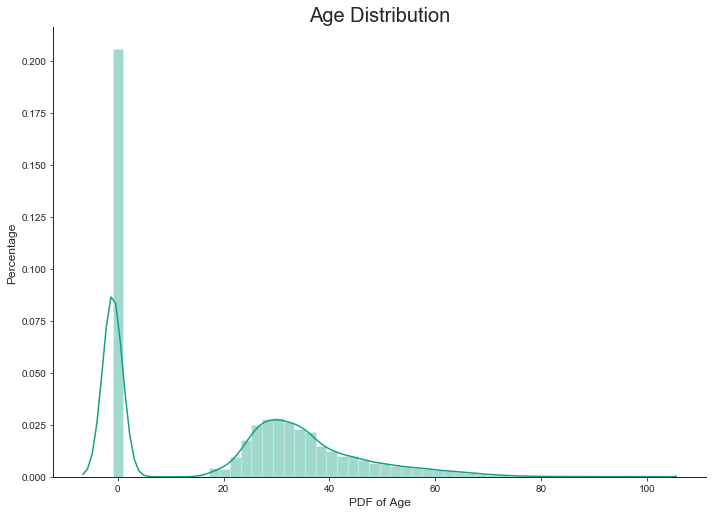

In [65]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(df.age.dropna(), color='#16A085')
plt.xlabel('PDF of Age')
plt.ylabel('Percentage')
plt.title('Age Distribution', size=20)
sns.despine()

* Observations :
      1 .  Majority of the users are between age 25 and 40 years . 
      2 .  There are some age values which are less than 18 years .

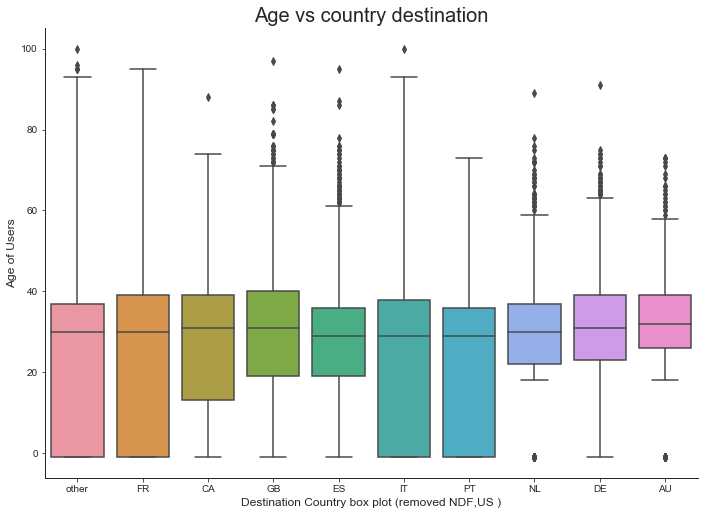

In [66]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = df[df['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.boxplot(y='age' , x='country_destination',data=data_without_NDF1)
plt.xlabel('Destination Country box plot (removed NDF,US )')
plt.ylabel('Age of Users')
plt.title('Age vs country destination', size=20)
sns.despine()

* Observations :
      1 .   Users booking for countries Spain, Portugal and Netherlands tend to be younger where as Users booking for Great Britain tend to be older.

#### 4) language

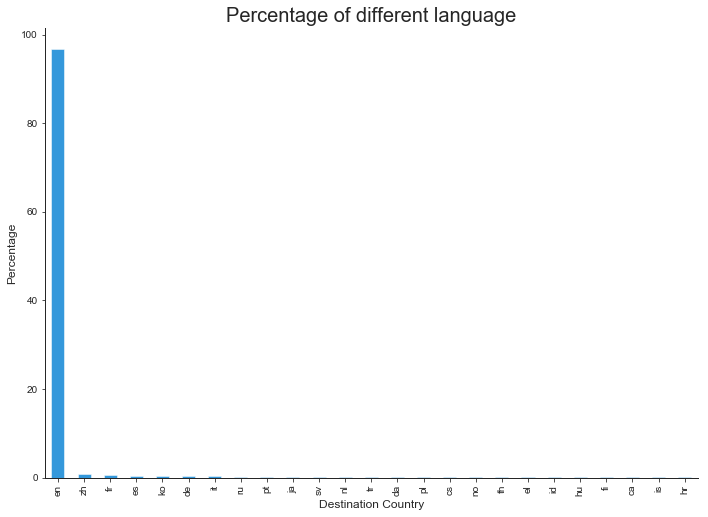

In [67]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
destination_percentage = df.language.value_counts() / df.shape[0] * 100
destination_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
plt.title('Percentage of different language', size=20)
sns.despine()

* Observations  : 
      1  .  Majority of the user's language preference is English (96.67%) . But it is still qu-estionable because most of users are from US 
      
#### 5) signup app 

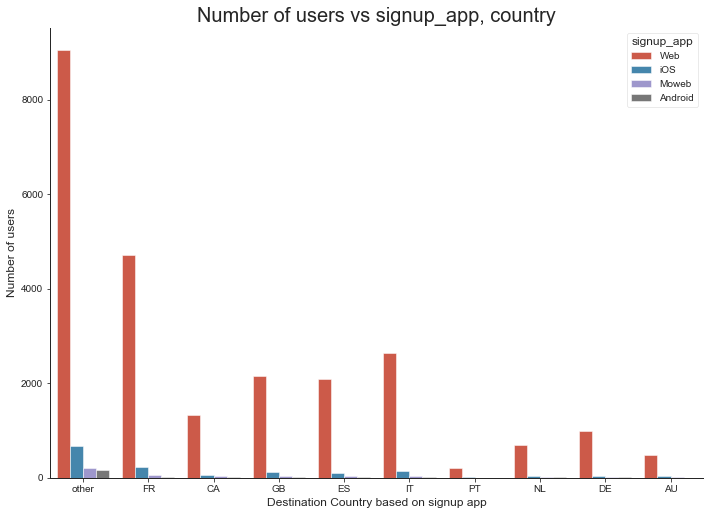

In [68]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = df[df['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_app',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup app')
plt.ylabel('Number of users')
plt.title('Number of users vs signup_app, country', size=20)
sns.despine()

* Observations :
      1 . Users with signup app 'Web' outnumbered other signup app like Moweb , iOS , Android in every country . 
      2 . Android is the least used signup app 
      
#### 6) signup method

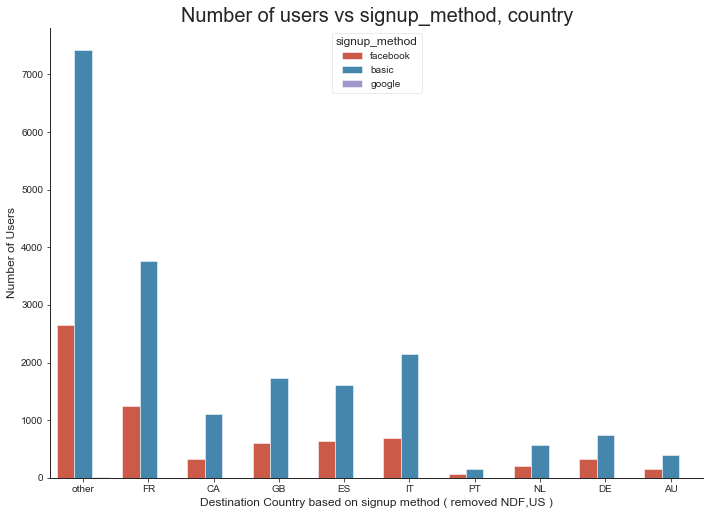

In [69]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = df[df['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_method',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup method ( removed NDF,US )')
plt.ylabel('Number of Users')
plt.title('Number of users vs signup_method, country', size=20)
sns.despine()

* Observations :
      1 .  There are less signups (almost negligible) happening by google signup compared to facebook,basic signup
      2 .  Basic signup count is almost 2.5 times facebook signup count .
      
#### 7) affiliate provider

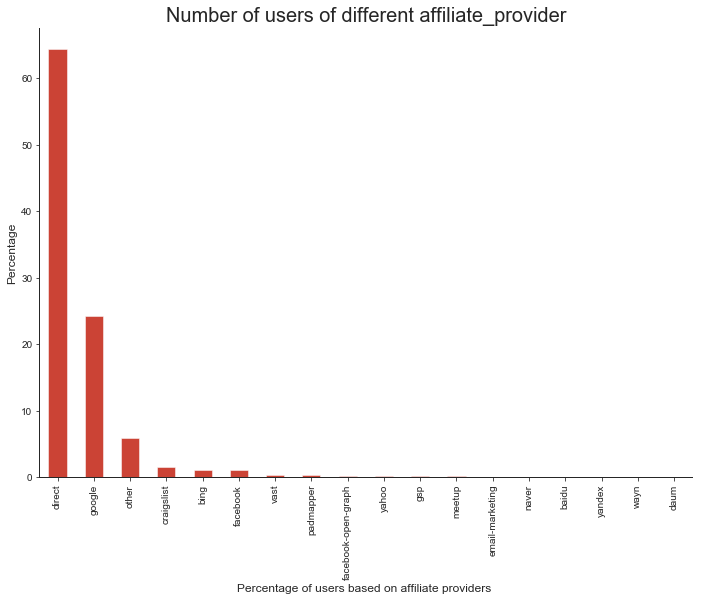

In [70]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
affiliate_provider_percentage = df.affiliate_provider.value_counts() / df.shape[0] * 100
affiliate_provider_percentage.plot(kind='bar',color='#CB4335')
plt.xlabel('Percentage of users based on affiliate providers ')
plt.ylabel('Percentage')
plt.title('Number of users of different affiliate_provider', size=20)
sns.despine()

* Observations :
      1 . In previous plot we have observed that percentage of users signing up with google are 0.03% , but in this plot we  observe that most of users are coming  from google (22%)

## Feature Engineering

In [71]:
labels = df['country_destination'].values

# drop the id column
# drop the date_first_booking 
# drop the label in training set
df.drop(['country_destination', 'date_first_booking', 'id'], axis = 1, inplace = True)

#### 1) date_account_created (dac)

In [72]:
df['date_account_created'] = pd.to_datetime(df.date_account_created)

# create year, month, day
df['dac_year'] = df['date_account_created'].dt.year
df['dac_month'] = df['date_account_created'].dt.month
df['dac_day'] = df['date_account_created'].dt.day # day of month

In [73]:
def get_season(dt):
    dt = dt.date()
    # dt must be a datetime type
    if dt.month in [3,4,5]:
        return 'Spring'    
    elif dt.month in [6,7,8]:
        return 'Summer'    
    elif dt.month in [9,10,11]:
        return 'Fall'   
    else:
        return 'Winter' 

In [74]:
# create feature season
df['dac_season'] = df['date_account_created'].apply(lambda x: get_season(x))

In [75]:
df.dac_season.value_counts()

Spring    68104
Summer    55865
Winter    47482
Fall      42000
Name: dac_season, dtype: int64

In [76]:
df_dac_season = pd.get_dummies(df.dac_season, prefix = 'dac_season')
df = pd.concat((df, df_dac_season), axis = 1)
df.drop(['dac_season'], axis = 1, inplace = True)

In [77]:
# create features of weekday for dac, showing Monday to Sunday
df['dac_wd'] = df['date_account_created'].dt.weekday

In [78]:
df.dac_wd.value_counts()

1    35085
2    34087
0    32862
3    32570
4    29741
6    24568
5    24538
Name: dac_wd, dtype: int64

In [79]:
df_dac_wd = pd.get_dummies(df.dac_wd, prefix = 'dac_wd')
df = pd.concat((df, df_dac_wd), axis = 1)
df.drop(['dac_wd'], axis = 1, inplace = True)

#### 2) age

In [80]:
## Keeping ages in 14 < age < 106 as OK
age = df['age']
interval = 15

def get_age(age):
    # age is a float number   
    if age < 0:
        return 'NA'
    elif (age < interval):
        return interval
    elif (age <= interval * 2):
        return interval*2
    elif (age <= interval * 3):
        return interval * 3
    elif (age <= interval * 4):
        return interval * 4
    elif (age <= interval * 5):
        return interval * 5
    elif (age <= interval * 6):
        return interval * 6
    elif (age <= interval * 7):
        return interval * 7
    else:
        return 'Unphysical'

In [81]:
df['age'] = np.array([get_age(x) for x in age])
df_age = pd.get_dummies(df.age, prefix = 'age')

In [82]:
df = pd.concat((df, df_age), axis = 1)

## Label Encoding and One Hot Encoding

In [83]:
df.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,dac_year,dac_month,dac_day,dac_season_Fall,dac_season_Spring,dac_season_Summer,dac_season_Winter,dac_wd_0,dac_wd_1,dac_wd_2,dac_wd_3,dac_wd_4,dac_wd_5,dac_wd_6,age_105,age_15,age_30,age_45,age_60,age_75,age_90,age_NA
0,2010-06-28,2.009030e+13,NaN,NA,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2011-05-25,2.009050e+13,MALE,45,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,2010-09-28,2.009060e+13,FEMALE,60,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2011-12-05,2.009100e+13,FEMALE,45,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2010-09-14,2.009120e+13,NaN,45,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [84]:
feature_OHE = ['gender', 
               'signup_method', 
               'signup_flow', 
               'language', 
               'affiliate_channel', 
               'affiliate_provider', 
               'first_affiliate_tracked', 
               'signup_app', 
               'first_device_type', 
               'first_browser']

In [85]:
from sklearn import preprocessing
LBL = preprocessing.LabelEncoder()

LE_vars=[]
LE_map=dict()
LE_map1=dict()
for cat_var in feature_OHE:
    print ("Label Encoding %s" % (cat_var))
    LE_var=cat_var+'_le'
    df[LE_var]=LBL.fit_transform(df[cat_var].fillna('none'))
    LE_vars.append(LE_var)
    LE_map1[cat_var]=dict(zip(LBL.classes_, LBL.transform(LBL.classes_))) ## Here you generate the mapping dictionary
    LE_map[cat_var]=LBL.classes_
print ("Label-encoded feaures: %s" % (LE_vars))

Label Encoding gender
Label Encoding signup_method
Label Encoding signup_flow
Label Encoding language
Label Encoding affiliate_channel
Label Encoding affiliate_provider
Label Encoding first_affiliate_tracked
Label Encoding signup_app
Label Encoding first_device_type
Label Encoding first_browser
Label-encoded feaures: ['gender_le', 'signup_method_le', 'signup_flow_le', 'language_le', 'affiliate_channel_le', 'affiliate_provider_le', 'first_affiliate_tracked_le', 'signup_app_le', 'first_device_type_le', 'first_browser_le']


In [86]:
OHE = preprocessing.OneHotEncoder(sparse=False)
start=time.time()
OHE.fit(df[LE_vars])
OHE_data=OHE.transform(df[LE_vars])
                                   
print ('One-hot-encoding finished in %f seconds' % (time.time()-start))


OHE_vars = [var[:-3] + '_' + str(level).replace(' ','_')\
                for var in feature_OHE for level in LE_map[var]]

print ("OHE size :" ,OHE_data.shape)
print ("One-hot encoded catgorical feature samples : %s" % (OHE_vars[:100]))

One-hot-encoding finished in 0.549197 seconds
OHE size : (213451, 148)
One-hot encoded catgorical feature samples : ['gen_FEMALE', 'gen_MALE', 'gen_OTHER', 'gen_none', 'signup_met_basic', 'signup_met_facebook', 'signup_met_google', 'signup_f_0', 'signup_f_1', 'signup_f_2', 'signup_f_3', 'signup_f_4', 'signup_f_5', 'signup_f_6', 'signup_f_8', 'signup_f_10', 'signup_f_12', 'signup_f_15', 'signup_f_16', 'signup_f_20', 'signup_f_21', 'signup_f_23', 'signup_f_24', 'signup_f_25', 'langu_ca', 'langu_cs', 'langu_da', 'langu_de', 'langu_el', 'langu_en', 'langu_es', 'langu_fi', 'langu_fr', 'langu_hr', 'langu_hu', 'langu_id', 'langu_is', 'langu_it', 'langu_ja', 'langu_ko', 'langu_nl', 'langu_no', 'langu_pl', 'langu_pt', 'langu_ru', 'langu_sv', 'langu_th', 'langu_tr', 'langu_zh', 'affiliate_chan_api', 'affiliate_chan_content', 'affiliate_chan_direct', 'affiliate_chan_other', 'affiliate_chan_remarketing', 'affiliate_chan_sem-brand', 'affiliate_chan_sem-non-brand', 'affiliate_chan_seo', 'affiliate_p

In [87]:
full_data = pd.concat((df, pd.DataFrame(OHE_data,columns=OHE_vars)), axis = 1)

In [88]:
full_data.head()
# After one hot encoding, 0 indicates non existent while 1 indicates existent.

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,dac_year,dac_month,dac_day,dac_season_Fall,dac_season_Spring,dac_season_Summer,dac_season_Winter,dac_wd_0,dac_wd_1,dac_wd_2,dac_wd_3,dac_wd_4,dac_wd_5,dac_wd_6,age_105,age_15,age_30,age_45,age_60,age_75,age_90,age_NA,gender_le,signup_method_le,signup_flow_le,language_le,affiliate_channel_le,affiliate_provider_le,first_affiliate_tracked_le,signup_app_le,first_device_type_le,first_browser_le,gen_FEMALE,gen_MALE,gen_OTHER,gen_none,signup_met_basic,signup_met_facebook,signup_met_google,signup_f_0,signup_f_1,signup_f_2,signup_f_3,signup_f_4,signup_f_5,signup_f_6,signup_f_8,signup_f_10,signup_f_12,signup_f_15,signup_f_16,signup_f_20,signup_f_21,signup_f_23,signup_f_24,signup_f_25,langu_ca,langu_cs,langu_da,langu_de,langu_el,langu_en,langu_es,langu_fi,langu_fr,langu_hr,langu_hu,langu_id,langu_is,langu_it,langu_ja,langu_ko,langu_nl,langu_no,langu_pl,langu_pt,langu_ru,langu_sv,langu_th,langu_tr,langu_zh,affiliate_chan_api,affiliate_chan_content,affiliate_chan_direct,affiliate_chan_other,affiliate_chan_remarketing,affiliate_chan_sem-brand,affiliate_chan_sem-non-brand,affiliate_chan_seo,affiliate_provi_baidu,affiliate_provi_bing,affiliate_provi_craigslist,affiliate_provi_daum,affiliate_provi_direct,affiliate_provi_email-marketing,affiliate_provi_facebook,affiliate_provi_facebook-open-graph,affiliate_provi_google,affiliate_provi_gsp,affiliate_provi_meetup,affiliate_provi_naver,affiliate_provi_other,affiliate_provi_padmapper,affiliate_provi_vast,affiliate_provi_wayn,affiliate_provi_yahoo,affiliate_provi_yandex,first_affiliate_trac_linked,first_affiliate_trac_local_ops,first_affiliate_trac_marketing,first_affiliate_trac_none,first_affiliate_trac_omg,first_affiliate_trac_product,first_affiliate_trac_tracked-other,first_affiliate_trac_untracked,signup__Android,signup__Moweb,signup__Web,signup__iOS,first_device_t_Android_Phone,first_device_t_Android_Tablet,first_device_t_Desktop_(Other),first_device_t_Mac_Desktop,first_device_t_Other/Unknown,first_device_t_SmartPhone_(Other),first_device_t_Windows_Desktop,first_device_t_iPad,first_device_t_iPhone,first_brow_-unknown-,first_brow_AOL_Explorer,first_brow_Android_Browser,first_brow_Apple_Mail,first_brow_Arora,first_brow_Avant_Browser,first_brow_BlackBerry_Browser,first_brow_Camino,first_brow_Chrome,first_brow_Chrome_Mobile,first_brow_Chromium,first_brow_CometBird,first_brow_Comodo_Dragon,first_brow_Conkeror,first_brow_CoolNovo,first_brow_Crazy_Browser,first_brow_Epic,first_brow_Firefox,first_brow_Flock,first_brow_Google_Earth,first_brow_Googlebot,first_brow_IE,first_brow_IE_Mobile,first_brow_IceDragon,first_brow_IceWeasel,first_brow_Iron,first_brow_Kindle_Browser,first_brow_Maxthon,first_brow_Mobile_Firefox,first_brow_Mobile_Safari,first_brow_Mozilla,first_brow_NetNewsWire,first_brow_OmniWeb,first_brow_Opera,first_brow_Opera_Mini,first_brow_Opera_Mobile,first_brow_Outlook_2007,first_brow_PS_Vita_browser,first_brow_Pale_Moon,first_brow_Palm_Pre_web_browser,first_brow_RockMelt,first_brow_Safari,first_brow_SeaMonkey,first_brow_Silk,first_brow_SiteKiosk,first_brow_SlimBrowser,first_brow_Sogou_Explorer,first_brow_Stainless,first_brow_TenFourFox,first_brow_TheWorld_Browser,first_brow_Yandex.Browser,first_brow_wOSBrowser
0,2010-06-28,2.009030e+13,NaN,NA,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,0,5,2,4,7,2,3,8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [89]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Columns: 193 entries, date_account_created to first_brow_wOSBrowser
dtypes: datetime64[ns](1), float64(149), int64(14), object(10), uint8(19)
memory usage: 287.2+ MB


In [90]:
# drop feature_OHE LE_vars
full_data = full_data.drop(feature_OHE+LE_vars,axis=1)

In [91]:
full_data.drop(['timestamp_first_active', 'age','date_account_created'], axis = 1, inplace = True)

In [92]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Columns: 170 entries, dac_year to first_brow_wOSBrowser
dtypes: float64(148), int64(3), uint8(19)
memory usage: 249.8 MB


## Modeling

In [93]:
from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [94]:
x_train,x_test,y_train,y_test = train_test_split(full_data, labels, random_state = 0)

In [95]:
N_ESTIMATORS = 50
RANDOM_STATE = 2017
MAX_DEPTH = 9
RF = RandomForestClassifier(n_estimators=N_ESTIMATORS,
                                 max_depth=MAX_DEPTH,
                                 random_state=RANDOM_STATE)

In [96]:
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=2017,
                       verbose=0, warm_start=False)

In [97]:
predict_test = RF.predict_proba(x_test)

In [98]:
predict_test

array([[0.00260599, 0.00668748, 0.00781592, ..., 0.0007621 , 0.34254999,
        0.0558659 ],
       [0.00351372, 0.01012898, 0.00618511, ..., 0.0014952 , 0.41727583,
        0.06158146],
       [0.00132145, 0.00491731, 0.00272547, ..., 0.00084333, 0.18646209,
        0.03446885],
       ...,
       [0.00102839, 0.00222161, 0.00106355, ..., 0.00043039, 0.09638828,
        0.01946537],
       [0.00269597, 0.00695914, 0.00554285, ..., 0.00108881, 0.34568488,
        0.05212761],
       [0.00132831, 0.00506819, 0.00286113, ..., 0.00085669, 0.18576675,
        0.0361128 ]])

## Model Evaluation

In [102]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

In [103]:
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelBinarizer

def dcg_score(y_true, y_score, k=5):
    
    """
    y_true : array, shape = [n_samples]
        Ground truth (true relevance labels).
    y_score : array, shape = [n_samples, n_classes]
        Predicted scores.
    k : int
    """
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)


def ndcg_score(ground_truth, predictions, k=5):
    
    """
    Parameters
    ----------
    ground_truth : array, shape = [n_samples]
        Ground truth (true labels represended as integers).
    predictions : array, shape = [n_samples, n_classes]
        Predicted probabilities.
    k : int
        Rank.
        
    Example
    -------
    >>> ground_truth = [1, 0, 2]
    >>> predictions = [[0.15, 0.55, 0.2], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    1.0
    >>> predictions = [[0.9, 0.5, 0.8], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    0.6666666666
    """
    lb = LabelBinarizer()
    lb.fit(range(len(predictions) + 1))
    T = lb.transform(ground_truth)

    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)

In [105]:
labels_le = preprocessing.LabelEncoder()
ytrain = labels_le.fit_transform(labels)
label_map = dict(zip(labels_le.classes_, labels_le.transform(labels_le.classes_)))

In [106]:
label_map

{'AU': 0,
 'CA': 1,
 'DE': 2,
 'ES': 3,
 'FR': 4,
 'GB': 5,
 'IT': 6,
 'NDF': 7,
 'NL': 8,
 'PT': 9,
 'US': 10,
 'other': 11}

In [109]:
k_ndcg = 5
train_ndcg_score = ndcg_score(ytrain[:1000], predict_test[:1000], k = k_ndcg)
train_ndcg_score

0.7454284443972728